This notebook inputs the number of ions and spits out the 2D location of each ion. 

In [6]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
plt.rcParams["figure.figsize"] = (3,3)
import os
import re

print (time.ctime())


Sun Jun 27 18:39:08 2021


4ions_y_149s
30.0 84.0
38.0 84.0
45.0 85.0
52.0 85.0
4ions_y_150s
30.0 84.0
38.0 84.0
45.0 85.0
52.0 85.0
4ions_y_151
31.0 85.0
38.0 85.0
45.0 85.0
52.0 85.0
4ions_y_151s
30.0 84.0
38.0 85.0
45.0 85.0
52.0 85.0
4ions_y_152
30.0 84.0
38.0 85.0
44.0 85.0
52.0 85.0
4ions_y_152s
30.0 84.0
37.0 85.0
44.0 85.0
52.0 85.0
4ions_y_153
28.0 84.0
42.0 85.0
49.0 85.0
52.0 86.0


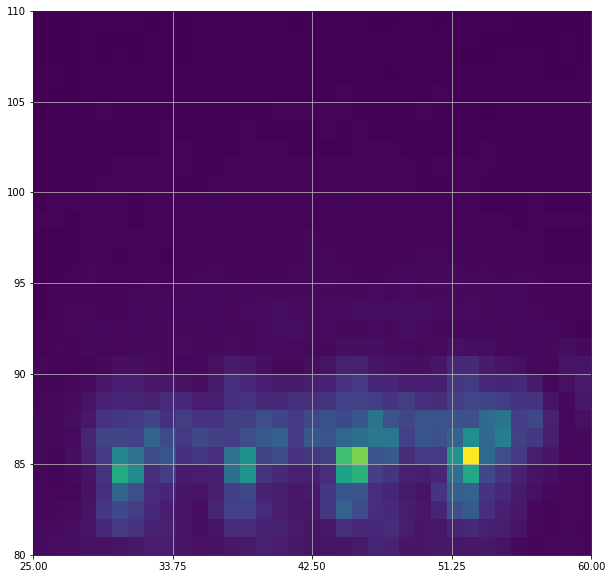

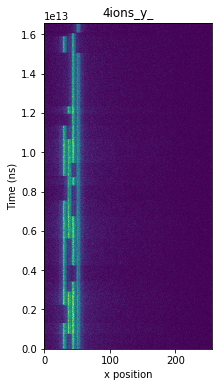

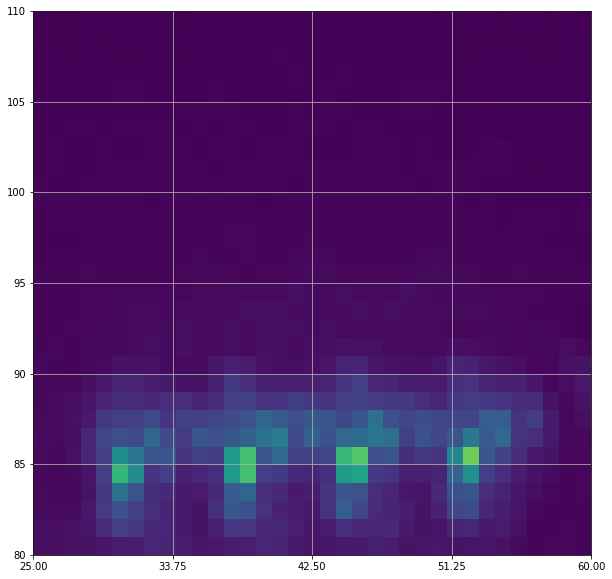

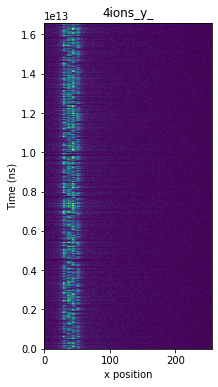

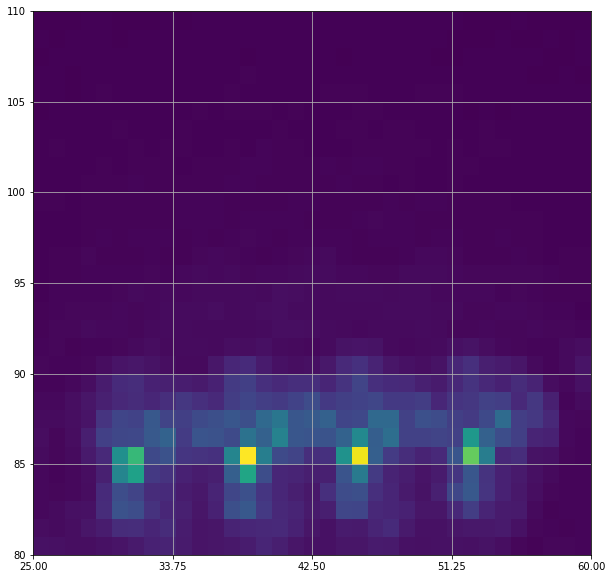

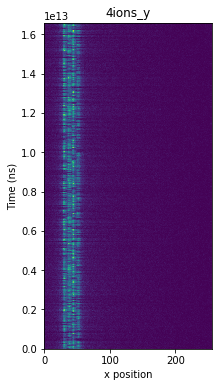

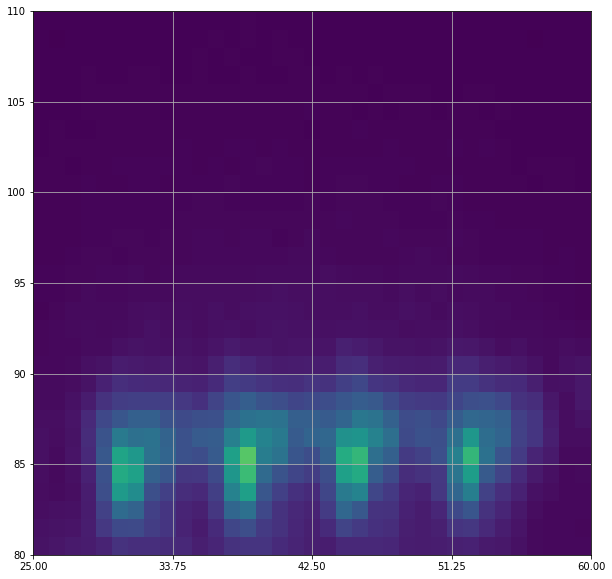

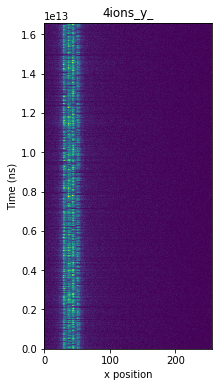

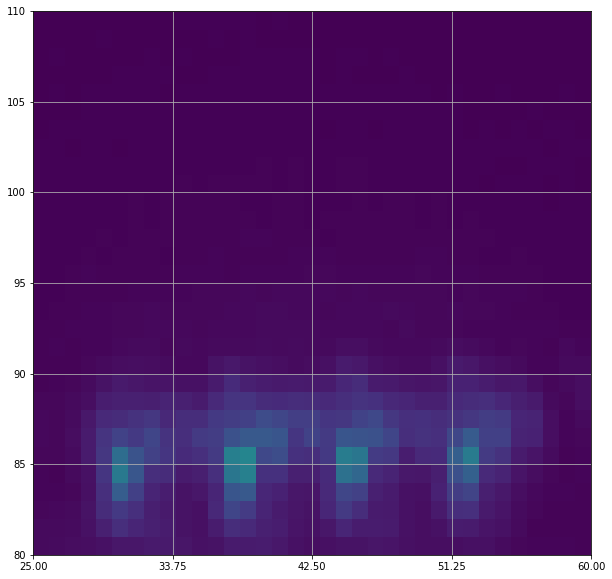

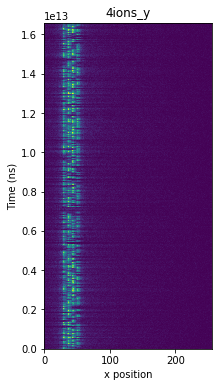

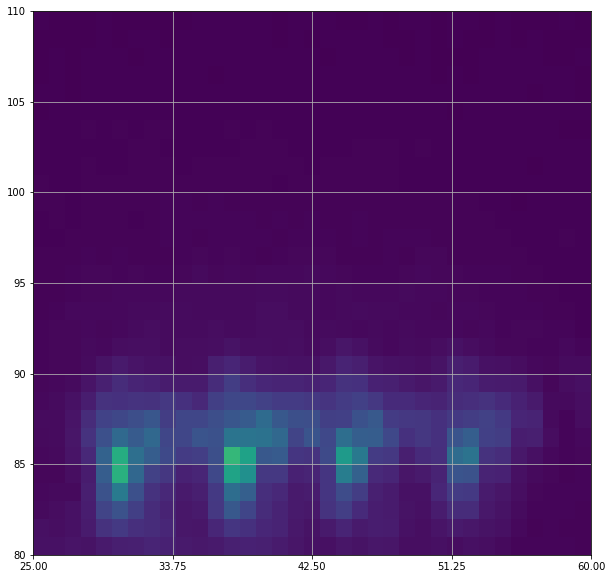

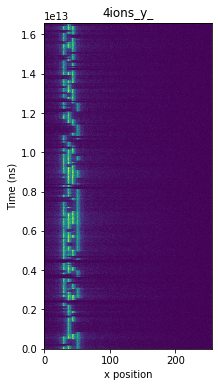

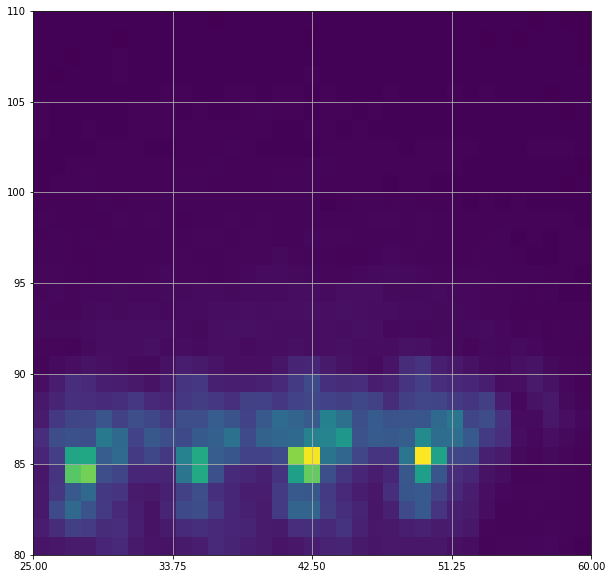

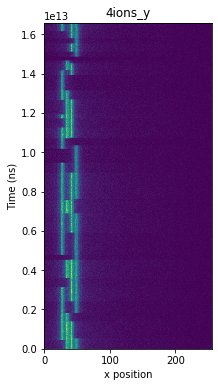

In [16]:
file_path="4ions/yscan"
for name in os.listdir(file_path):
   
    filename = name
    if filename.startswith("4ions")== True and filename.endswith(".csv")==False :
        print (filename)
        it = pd.read_csv(f'{file_path}/{filename}')
        
        it = it.drop(columns = 'Unnamed: 5')
        it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
        ToA = it['time']
        it['time'] = it['time'] - ToA[0]
        it = it.sort_values(['time'])
        it
    
        new_filename = (f'{file_path}/{filename[0:-4]}')    ##slicing removes .csv 
        it.to_csv(new_filename)  ##### changes actual file
        it
        new_filename=filename

    # This cell is used to see an image of the ions. Helpful to make sure ions did not move (blurry) and that there weren't spatial errors 
    # Helpful also to identify the locaitons of the ions.
        plt.figure(figsize=(10, 10))
    
        it = pd.read_csv(f'{file_path}/{filename}')
        plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
        n=4
        plt.xlim(25,60)
        plt.ylim(80, 110)                                                  #fitting each ion within a box of width f 
        grid_x=np.linspace(25,60,(n+1))
        plt.xticks(grid_x)
        plt.grid()

        a=np.empty((n,2))
        for i in range (1,n+1):
            temp=it[(it['x']>grid_x[i-1]) & (it['x'] <grid_x[i])]                          # sub-dataframe for x values between upper and lower bounds of box
            temp_2=temp.groupby(["x",'y']).size().idxmax() 
            a[i-1][0]=temp_2[0]; a[i-1][1]=temp_2[1]

        x1=a[0][0]; y1=a[0][1]
        x2=a[1][0]; y2=a[1][1]
        x3=a[2][0]; y3=a[2][1]
        x4=a[3][0]; y4=a[3][1]

        print (x1,y1),;print (x2,y2);print (x3,y3);print (x4,y4)
        

        it = pd.read_csv(f'{file_path}/{filename}')  
        it = it.drop(columns = {'Unnamed: 0'})
        it


    # Check the data over time to see if there are times in which the chain is broken or melted. 
    # Find start and end of the broken crystal times and plug that into the start and end variables. 
        fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
        h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
    #ax0.set_xlim(x1-5,x1+5)
        ax0.set_xlabel('x position')
        ax0.set_ylabel('Time (ns)')
        ax0.set_title(name[:-4])

    #it['time'].max()
        start = 0; end = it['time'].max(); duration = end - start
        ax0.set_ylim(start, end)

28.0 84.0
35.0 84.0
42.0 85.0
49.0 85.0


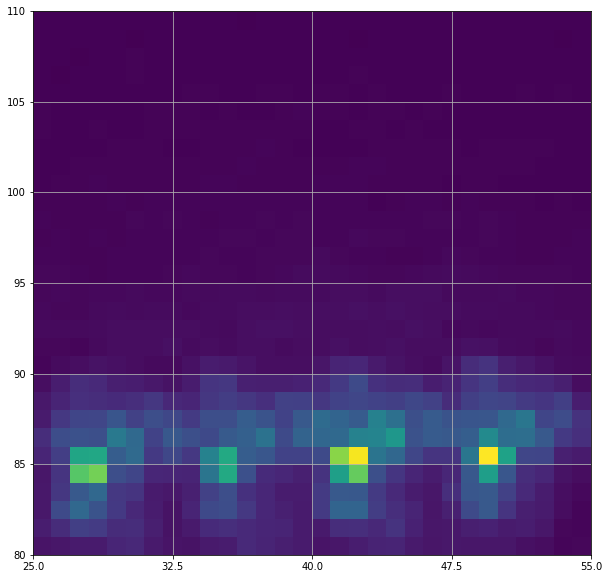

In [22]:
        plt.figure(figsize=(10, 10))
    
        it = pd.read_csv("4ions/yscan/4ions_y_153")
        plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
        n=4
        plt.xlim(25,55)
        plt.ylim(80, 110)                                                  #fitting each ion within a box of width f 
        grid_x=np.linspace(25,55,(n+1))
        plt.xticks(grid_x)
        plt.grid()

        a=np.empty((n,2))
        for i in range (1,n+1):
            temp=it[(it['x']>grid_x[i-1]) & (it['x'] <grid_x[i])]                          # sub-dataframe for x values between upper and lower bounds of box
            temp_2=temp.groupby(["x",'y']).size().idxmax() 
            a[i-1][0]=temp_2[0]; a[i-1][1]=temp_2[1]

        x1=a[0][0]; y1=a[0][1]
        x2=a[1][0]; y2=a[1][1]
        x3=a[2][0]; y3=a[2][1]
        x4=a[3][0]; y4=a[3][1]

        print (x1,y1),;print (x2,y2);print (x3,y3);print (x4,y4)

In [ ]:
#120V_1
x1= 46; y1= 85          
x2= 56; y2= 85       
x3= 65; y3= 86
x4= 74; y4= 86
x5= 85; y5= 86

#120V_2
x1= 46; y1= 85          
x2= 57; y2= 85       
x3= 65; y3= 86
x4= 75; y4= 86
x5= 84; y5= 86

#258V_1
x1= 48; y1= 85          
x2= 55; y2= 85       
x3= 62; y3= 86
x4= 68; y4= 86
x5= 77; y5= 86

#258V_2
x1= 48; y1= 85          
x2= 55; y2= 85       
x3= 63; y3= 86
x4= 69; y4= 86
x5= 77; y5= 86

#258V_3
x1= 48; y1= 85          
x2= 55; y2= 85       
x3= 63; y3= 86
x4= 69; y4= 86
x5= 77; y5= 86

#258V_4
x1= 47; y1= 85          
x2= 55; y2= 85       
x3= 63; y3= 86
x4= 69; y4= 86
x5= 77; y5= 86

#370V_1
x1= 48; y1= 85          
x2= 55; y2= 85       
x3= 61; y3= 86
x4= 67; y4= 86
x5= 74; y5= 86

#370V_2
x1= 48; y1= 85          
x2= 55; y2= 85       
x3= 61; y3= 86
x4= 67; y4= 86
x5= 74; y5= 86


#370V_3
x1= 48; y1= 85          
x2= 55; y2= 85       
x3= 61 ;y3= 86
x4= 67; y4= 86
x5= 74 ;y5= 86

#370V_4
x1= 48; y1= 85          
x2= 55; y2= 85       
x3= 61; y3= 86
x4= 67; y4= 86
x5= 74; y5= 86


xscan_401s
27.0 84.0
35.0 85.0
41.0 85.0
49.0 85.0
xscan_402
27.0 84.0
35.0 84.0
41.0 84.0
49.0 85.0
xscan_402s
29.0 86.0
31.0 85.0
44.0 85.0
52.0 85.0
xscan_403
28.0 84.0
35.0 85.0
42.0 85.0
49.0 85.0
xscan_403s
27.0 84.0
35.0 85.0
41.0 85.0
49.0 85.0
xscan_404
27.0 84.0
35.0 85.0
42.0 85.0
49.0 85.0


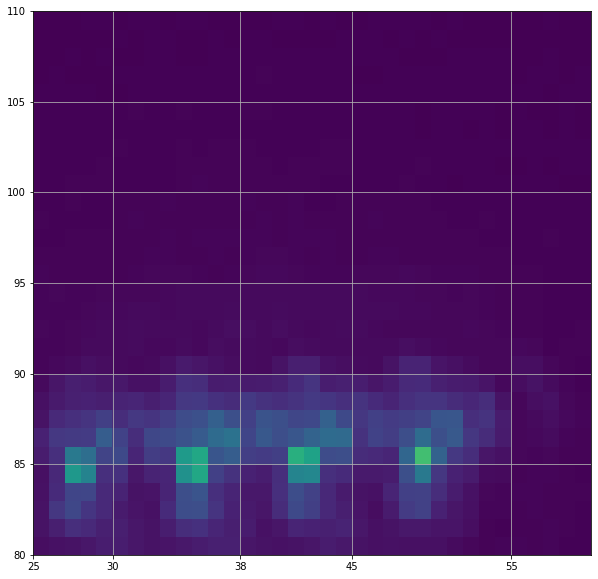

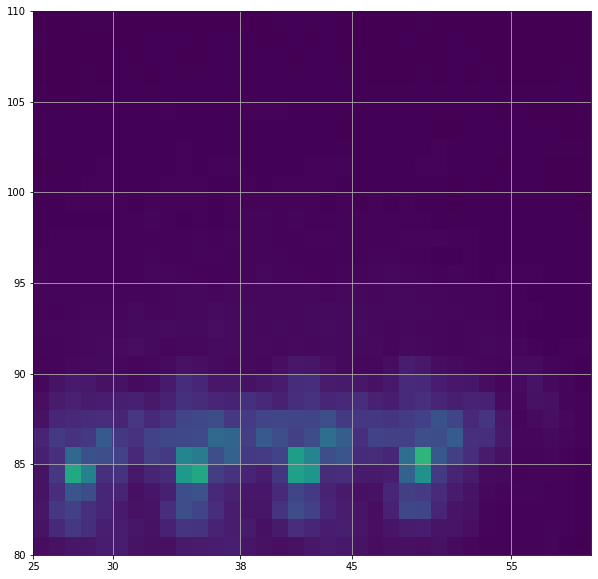

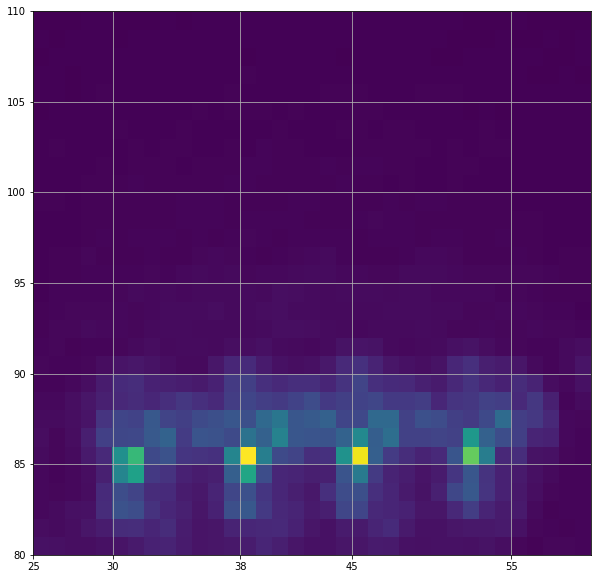

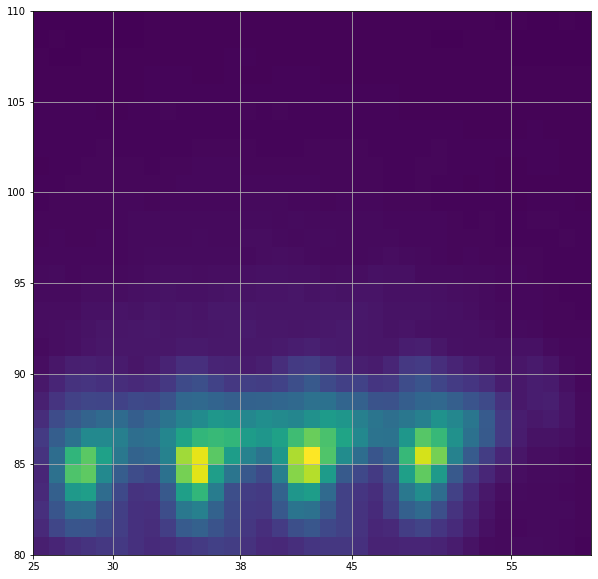

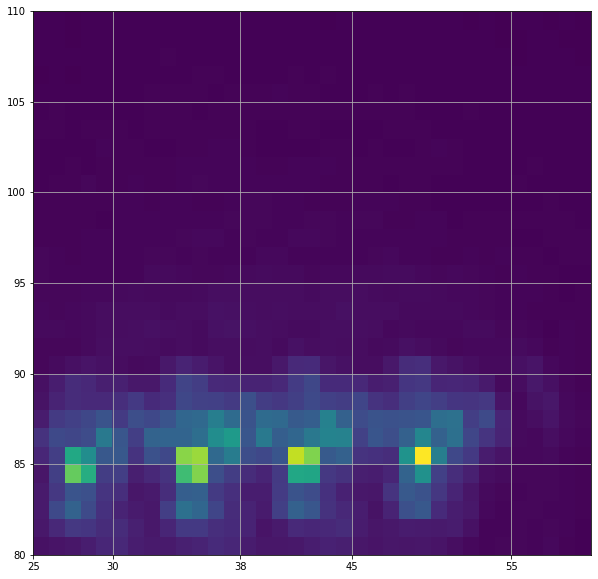

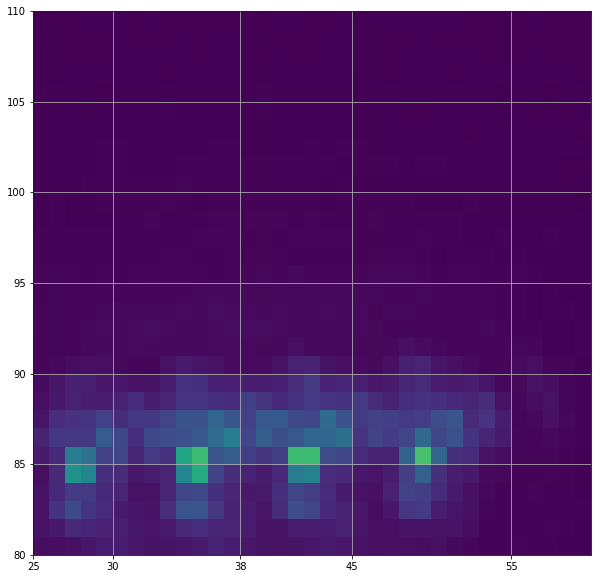

In [12]:
file_path="4ions/xscan"
for name in os.listdir(file_path):
    
    filename = name
    if filename.startswith("xscan")== True  :
        print (filename)
        """it = pd.read_csv(f'{file_path}/{filename}')
        
        it = it.drop(columns = 'Unnamed: 5')
        it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
        ToA = it['time']
        it['time'] = it['time'] - ToA[0]
        it = it.sort_values(['time'])
        it
    
        new_filename = (f'{file_path}/{filename[0:-4]}')    ##slicing removes .csv 
        it.to_csv(new_filename)  ##### changes actual file
        it"""
        new_filename=filename

    # This cell is used to see an image of the ions. Helpful to make sure ions did not move (blurry) and that there weren't spatial errors 
    # Helpful also to identify the locaitons of the ions.
        plt.figure(figsize=(10, 10))
    
        it = pd.read_csv(f'{file_path}/{filename}')
        plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
        n=4
        plt.xlim(25,60)
        plt.ylim(80, 110)                                                  #fitting each ion within a box of width f 
        grid_x=[25,30,36,45,55]
        plt.xticks(grid_x)
        plt.grid()

        a=np.empty((n,2))
        for i in range (1,n+1):
            temp=it[(it['x']>grid_x[i-1]) & (it['x'] <grid_x[i])]                          # sub-dataframe for x values between upper and lower bounds of box
            temp_2=temp.groupby(["x",'y']).size().idxmax() 
            a[i-1][0]=temp_2[0]; a[i-1][1]=temp_2[1]

        x1=a[0][0]; y1=a[0][1]
        x2=a[1][0]; y2=a[1][1]
        x3=a[2][0]; y3=a[2][1]
        x4=a[3][0]; y4=a[3][1]

        print (x1,y1),;print (x2,y2);print (x3,y3);print (x4,y4)
        



xscan_402s
31.0 85.0
38.0 85.0
44.0 85.0
52.0 85.0
xscan_403
28.0 84.0
35.0 85.0
42.0 85.0
49.0 85.0


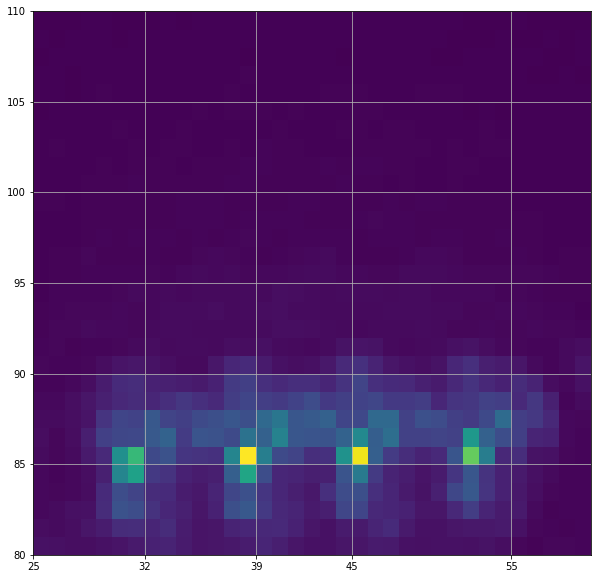

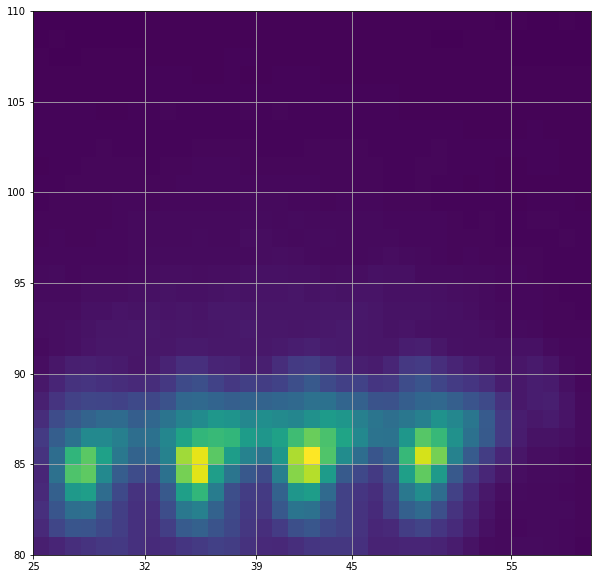

In [15]:
for name in os.listdir(file_path):
    
    filename = name
    if filename== "xscan_402s" or filename== "xscan_403" :
        print (filename)
        """it = pd.read_csv(f'{file_path}/{filename}')
        
        it = it.drop(columns = 'Unnamed: 5')
        it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
        ToA = it['time']
        it['time'] = it['time'] - ToA[0]
        it = it.sort_values(['time'])
        it
    
        new_filename = (f'{file_path}/{filename[0:-4]}')    ##slicing removes .csv 
        it.to_csv(new_filename)  ##### changes actual file
        it"""
        new_filename=filename

    # This cell is used to see an image of the ions. Helpful to make sure ions did not move (blurry) and that there weren't spatial errors 
    # Helpful also to identify the locaitons of the ions.
        plt.figure(figsize=(10, 10))
    
        it = pd.read_csv(f'{file_path}/{filename}')
        plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
        n=4
        plt.xlim(25,60)
        plt.ylim(80, 110)                                                  #fitting each ion within a box of width f 
        grid_x=[25,32,39,45,55]
        plt.xticks(grid_x)
        plt.grid()

        a=np.empty((n,2))
        for i in range (1,n+1):
            temp=it[(it['x']>grid_x[i-1]) & (it['x'] <grid_x[i])]                          # sub-dataframe for x values between upper and lower bounds of box
            temp_2=temp.groupby(["x",'y']).size().idxmax() 
            a[i-1][0]=temp_2[0]; a[i-1][1]=temp_2[1]

        x1=a[0][0]; y1=a[0][1]
        x2=a[1][0]; y2=a[1][1]
        x3=a[2][0]; y3=a[2][1]
        x4=a[3][0]; y4=a[3][1]

        print (x1,y1),;print (x2,y2);print (x3,y3);print (x4,y4)
        